In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\greenAI\day-9\lab-3\energy_data.csv")
df.head()

,timestamp,location,energy_consumption,temperature
0,1/1/2023 0:00,Industrial,139.101364,33.820542
1,1/1/2023 1:00,Residential,247.109808,26.392602
2,1/1/2023 2:00,Industrial,233.934693,25.027439
3,1/1/2023 3:00,Industrial,243.013532,27.107712
4,1/1/2023 4:00,Residential,313.502582,27.326153


In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.dropna()
df = df.set_index('timestamp')

In [11]:
X = df[['energy_consumption', 'temperature']]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

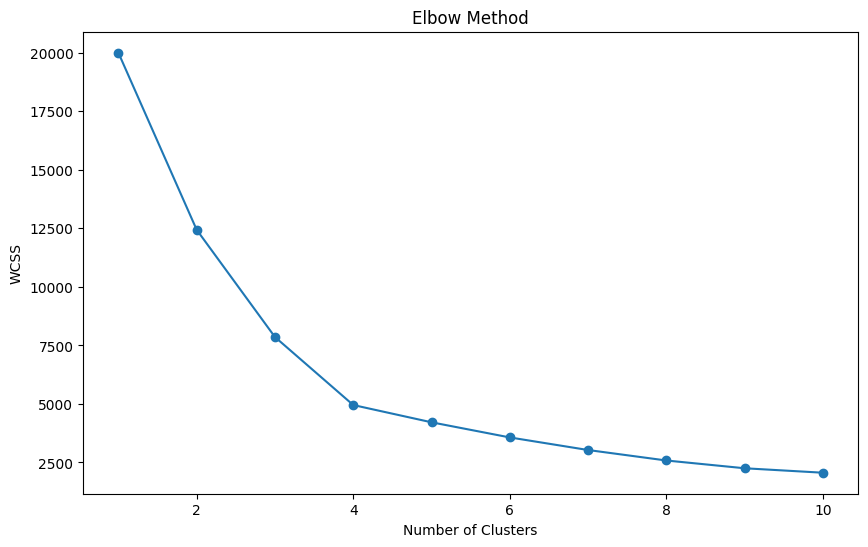

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

# First, we need to fit KMeans and create clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

c:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.38


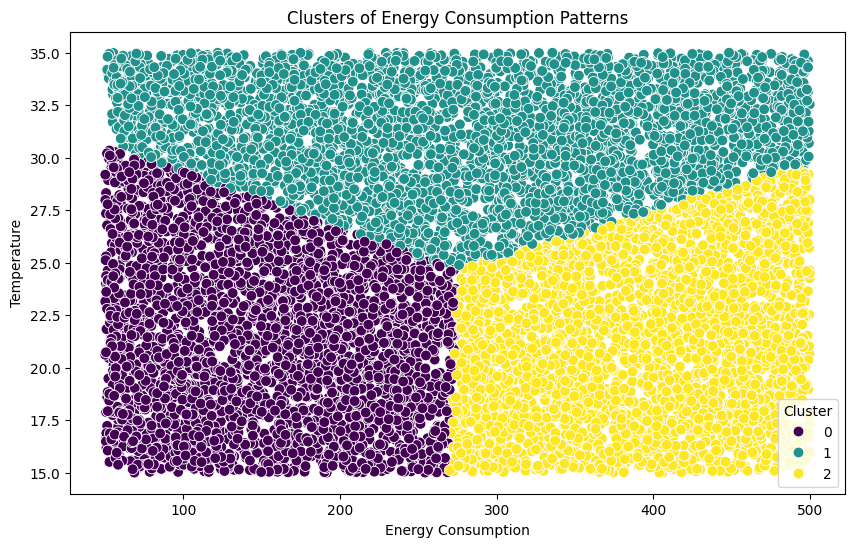

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_consumption', y='temperature', hue='cluster', data=df, palette='viridis', s=60)
plt.title('Clusters of Energy Consumption Patterns')
plt.xlabel('Energy Consumption')
plt.ylabel('Temperature')
plt.legend(title='Cluster')
plt.show()